In [ ]:
!gdown 1-EVUZwBdukASlob7gs-8mabzIwpnpwQg
!gdown 1-BYQhM7AC2ap7mjXEqaHwmG5R_jsV6UR
!gdown 1-7fD7fuztyjR2sEc75SXmGL6u5lRtEgP

Downloading...
From: https://drive.google.com/uc?id=1-EVUZwBdukASlob7gs-8mabzIwpnpwQg
To: /content/load_features.py
100% 531/531 [00:00<00:00, 2.52MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-BYQhM7AC2ap7mjXEqaHwmG5R_jsV6UR
To: /content/test_data.npz
100% 103M/103M [00:00<00:00, 204MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-7fD7fuztyjR2sEc75SXmGL6u5lRtEgP
To: /content/train_data.npz
100% 103M/103M [00:01<00:00, 101MB/s] 


# phase2: part1

In [ ]:
import numpy as np
from typing import Tuple

def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['features'], data['domains'], data['digits']

features_train, domains_train, digits_train = \
    load_data('train_data.npz')

print(features_train.shape)
print(np.unique(domains_train, return_counts=True))

features_test, domains_test, digits_test = \
    load_data('test_data.npz')
print(features_test.shape)
print(np.unique(domains_test, return_counts=True))

(25000, 1024)
(array([0, 1, 2, 3, 4]), array([5000, 5000, 5000, 5000, 5000]))
(25000, 1024)
(array([0, 1, 2, 3, 4]), array([5000, 5000, 5000, 5000, 5000]))


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from typing import Tuple

rf_model_0 = RandomForestClassifier()
# n_estimators  num of trees in forest
# max_depth  max depth of trees
# min_samples_split  min num of samples required to be split (how deep the tree can grow)
# min_samples_leaf    min num of samples at leaf (control the size of terminal nodes)

rf_model_0 = RandomForestClassifier(n_estimators=130,
                                        max_depth=6,
                                        min_samples_split=2,
                                        min_samples_leaf=1)
rf_model_0.fit(features_train, digits_train)
accuracy = rf_model_0.score(features_test, digits_test)
print("Accuracy:", accuracy)

Accuracy: 0.74988


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from typing import Tuple

rf_model_1 = RandomForestClassifier()
# n_estimators  num of trees in forest
# max_depth  max depth of trees
# min_samples_split  min num of samples required to be split (how deep the tree can grow)
# min_samples_leaf    min num of samples at leaf (control the size of terminal nodes)

rf_model_1 = RandomForestClassifier(n_estimators=100,
                                        max_depth=None,
                                        min_samples_split=3,
                                        min_samples_leaf=2)
rf_model_1.fit(features_train, digits_train)
accuracy = rf_model_1.score(features_test, digits_test)
print("Accuracy:", accuracy)

Accuracy: 0.86304


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from typing import Tuple

rf_model_2 = RandomForestClassifier()
# n_estimators  num of trees in forest
# max_depth  max depth of trees
# min_samples_split  min num of samples required to be split (how deep the tree can grow)
# min_samples_leaf    min num of samples at leaf (control the size of terminal nodes)

rf_model_2 = RandomForestClassifier(n_estimators=70,
                                        max_depth=7,
                                        min_samples_split=4,
                                        min_samples_leaf=2)
rf_model_2.fit(features_train, digits_train)
accuracy = rf_model_2.score(features_test, digits_test)
print("Accuracy:", accuracy)

Accuracy: 0.76788


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from typing import Tuple

rf_model_3 = RandomForestClassifier()
# n_estimators  num of trees in forest
# max_depth  max depth of trees
# min_samples_split  min num of samples required to be split (how deep the tree can grow)
# min_samples_leaf    min num of samples at leaf (control the size of terminal nodes)

rf_model_3 = RandomForestClassifier(n_estimators=40,
                                        max_depth=6,
                                        min_samples_split=3,
                                        min_samples_leaf=2)
rf_model_3.fit(features_train, digits_train)
accuracy = rf_model_3.score(features_test, digits_test)
print("Accuracy:", accuracy)

Accuracy: 0.73276


In [ ]:
from sklearn.metrics import confusion_matrix
digits_pred = rf_model_1.predict(features_test)
conf_mat = confusion_matrix(digits_test, digits_pred)
print("Confusion matrix:")
print(conf_mat)

Confusion matrix:
[[2371  102   49   25   24   14   28   11   23    8]
 [  12 3084   66   24   51    9    9   65   17    4]
 [  11   66 2515   40   25    4    7   26   15   10]
 [  16   69   82 2119   25   81   10   15   50   11]
 [   9  109   35   11 2102    4   22   11   11   48]
 [  11   32   37  123   25 1998   54   11   34   17]
 [  49   67   30   33   55  115 1910    3   43    5]
 [   8  132   89   24   17    8    4 2064    6   21]
 [  31   71   75  126   34   67   60   13 1657   28]
 [  55   44   91   72  116   34   10   37   43 1756]]


# phase2: part2

In [ ]:
import pandas as pd
import sys
import numpy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
sum=0
forest_train = []
for domain in range(5):
    features_d_train = features_train[domains_train == domain]
    digits_d_train = digits_train[domains_train == domain]
    domain_rfc = RandomForestClassifier(n_estimators=50, random_state=0)
    domain_rfc.fit(features_d_train, digits_d_train)
    forest_train.append(domain_rfc)

for domain in range(5):
    features_d_test = features_test[domains_test == domain]
    digits_d_test = digits_test[domains_test == domain]
    digits_pred = forest_train[domain].predict(features_d_test)
    digit_acc = accuracy_score(digits_d_test, digits_pred)
    accuracy = forest_train[domain].score(features_d_test, digits_d_test)
    print(f"Accuracy domain { domain }:", accuracy)
    sum = sum + accuracy

avg=sum/5
print("average accuracy:", avg)

Accuracy domain 0: 0.9674
Accuracy domain 1: 0.8124
Accuracy domain 2: 0.7104
Accuracy domain 3: 0.7818
Accuracy domain 4: 0.985
average accuracy: 0.8514000000000002


Confusion matrix :


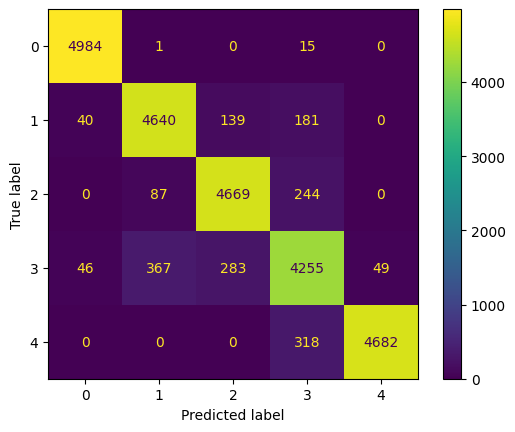

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
domain_rf = RandomForestClassifier(n_estimators=50, random_state=0)
domain_rf.fit(features_train, domains_train)
domain_pred = domain_rf.predict(features_test)
print(f"Confusion matrix :") 
confusion_matrix = metrics.confusion_matrix(domains_test, domain_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4"])
cm_display.plot()
plt.show()

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Accuracy domain 0: 0.9674
Confusion matrix 0:


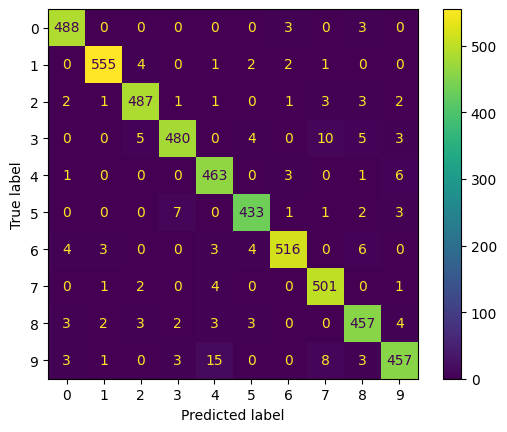

Accuracy domain 1: 0.8124
Confusion matrix 1:


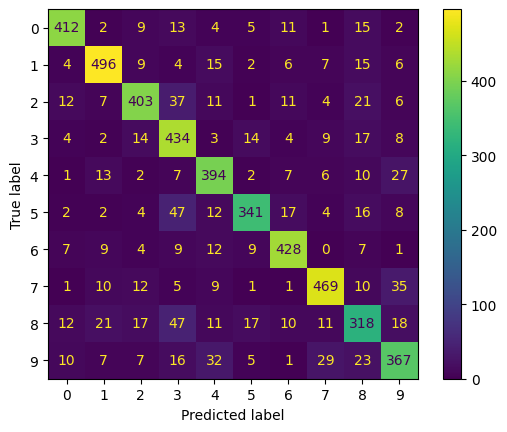

Accuracy domain 2: 0.7104
Confusion matrix 2:


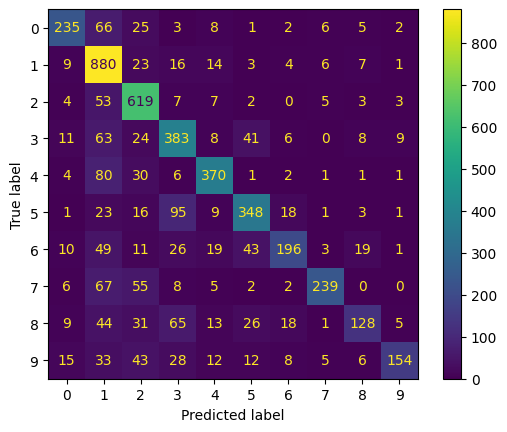

Accuracy domain 3: 0.7818
Confusion matrix 3:


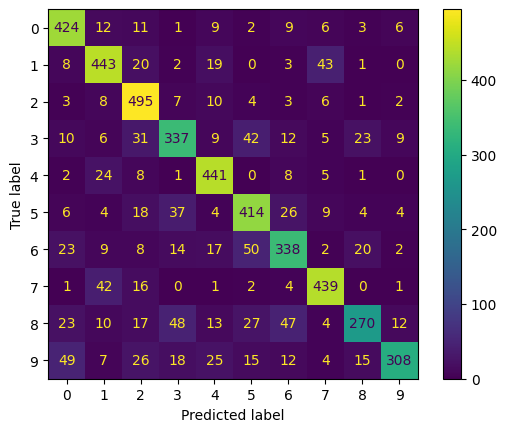

Accuracy domain 4: 1.0
Confusion matrix 4:


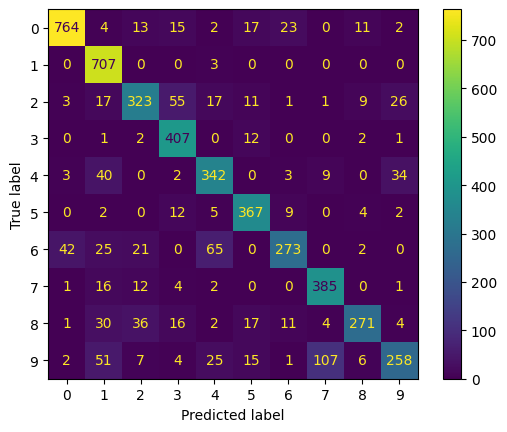

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
for domain in range(5):
    features_d_test = features_test[domains_test == domain ]
    digits_d_test = digits_test[domains_test == domain]
    digits_pred = forest_train[domain].predict(features_d_test)
    domain_rfc.fit(features_d_test, digits_d_test)
    accuracy = forest_train[domain].score(features_d_test, digits_d_test)
    print(f"Accuracy domain { domain }:", accuracy)
    print(f"Confusion matrix {domain}:") 
    confusion_matrix = metrics.confusion_matrix(digits_d_test, digits_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4","5","6","7","8","9"])
    cm_display.plot()
    plt.show()

Accuracy domain 0: 0.9209090909090909
Confusion matrix 0:


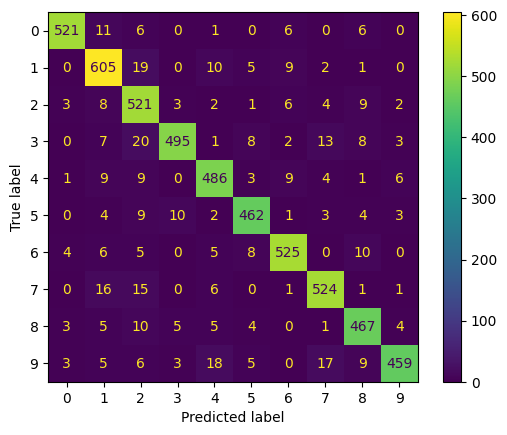

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
sum1=0
features_d_test = features_test[domains_test == 4] 
digits_d_test = digits_test[domains_test == 4] 
features_d_test1 = features_test[domains_test == 0] 
digits_d_test1 = digits_test[domains_test == 0] 
features_d_test2 = features_test[domains_test == 2] 
digits_d_test2 = digits_test[domains_test == 2] 
features = np.concatenate((features_d_test[:300], features_d_test1[:4900], features_d_test2[:300]))
digits = np.concatenate((digits_d_test[:300], digits_d_test1[:4900], digits_d_test2[:300]))
digits_pred = forest_train[0].predict(features)
accuracy = forest_train[0].score(features, digits)
sum1+=accuracy
print(f"Accuracy domain { 0 }:", accuracy)
print(f"Confusion matrix { 0 }:") 
confusion_matrix = metrics.confusion_matrix(digits, digits_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4","5","6","7","8","9"])
cm_display.plot()
plt.show()

Accuracy domain 1: 0.8048
Confusion matrix 1:


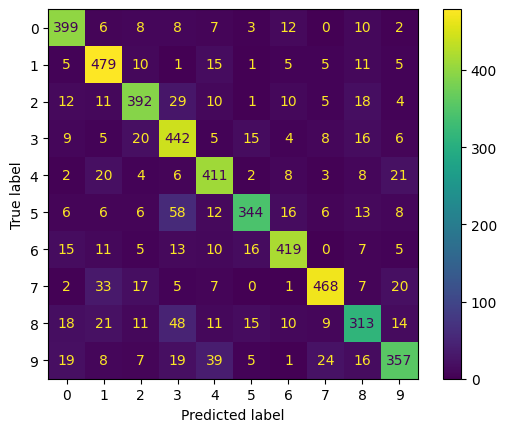

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
features_d_test = features_test[domains_test == 3] 
digits_d_test = digits_test[domains_test == 3] 
features_d_test1 = features_test[domains_test == 1] 
digits_d_test1 = digits_test[domains_test == 1] 
features_d_test2 = features_test[domains_test == 0] 
digits_d_test2 = digits_test[domains_test == 0] 
features = np.concatenate((features_d_test[:500], features_d_test1[:3500], features_d_test2[:1000]))
digits = np.concatenate((digits_d_test[:500], digits_d_test1[:3500], digits_d_test2[:1000]))
digits_pred = forest_train[1].predict(features)
accuracy = forest_train[1].score(features, digits)
sum1+=accuracy
print(f"Accuracy domain { 1 }:", accuracy)
print(f"Confusion matrix { 1 }:") 
confusion_matrix = metrics.confusion_matrix(digits, digits_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4","5","6","7","8","9"])
cm_display.plot()
plt.show()

Accuracy domain 2: 0.691
Confusion matrix 2:


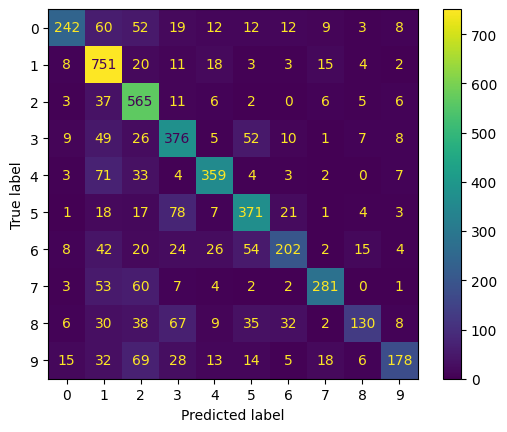

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
features_d_test = features_test[domains_test == 3] 
digits_d_test = digits_test[domains_test == 3] 
features_d_test1 = features_test[domains_test == 2] 
digits_d_test1 = digits_test[domains_test == 2] 
features_d_test2 = features_test[domains_test == 4] 
digits_d_test2 = digits_test[domains_test == 4] 
features = np.concatenate((features_d_test[:1000], features_d_test1[:3500], features_d_test2[:500]))
digits = np.concatenate((digits_d_test[:1000], digits_d_test1[:3500], digits_d_test2[:500]))
digits_pred = forest_train[2].predict(features)
accuracy = forest_train[2].score(features, digits)
sum1+=accuracy
print(f"Accuracy domain { 2 }:", accuracy)
print(f"Confusion matrix { 2 }:") 
confusion_matrix = metrics.confusion_matrix(digits, digits_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4","5","6","7","8","9"])
cm_display.plot()
plt.show()

Accuracy domain 3: 0.804
Confusion matrix 3:


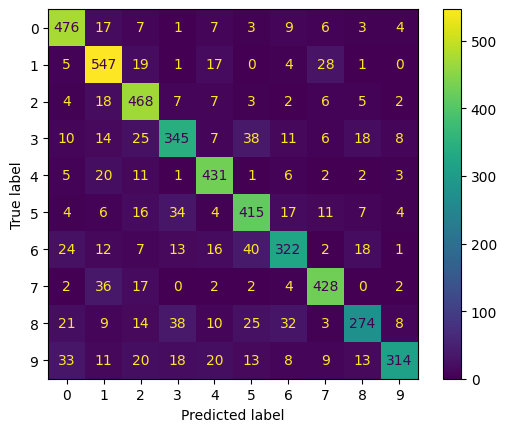

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
features_d_test = features_test[domains_test == 2] 
digits_d_test = digits_test[domains_test == 2] 
features_d_test1 = features_test[domains_test == 3] 
digits_d_test1 = digits_test[domains_test == 3] 
features_d_test2 = features_test[domains_test == 4] 
digits_d_test2 = digits_test[domains_test == 4] 
features = np.concatenate((features_d_test[:500], features_d_test1[:3500], features_d_test2[:1000]))
digits = np.concatenate((digits_d_test[:500], digits_d_test1[:3500], digits_d_test2[:1000]))
digits_pred = forest_train[3].predict(features)
domain_rfc.fit(features_d_test, digits_d_test)
accuracy = forest_train[3].score(features, digits)
sum1+=accuracy
print(f"Accuracy domain { 3 }:", accuracy)
print(f"Confusion matrix { 3 }:") 
confusion_matrix = metrics.confusion_matrix(digits, digits_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4","5","6","7","8","9"])
cm_display.plot()
plt.show()

Accuracy domain 4: 0.8182
Confusion matrix 4:


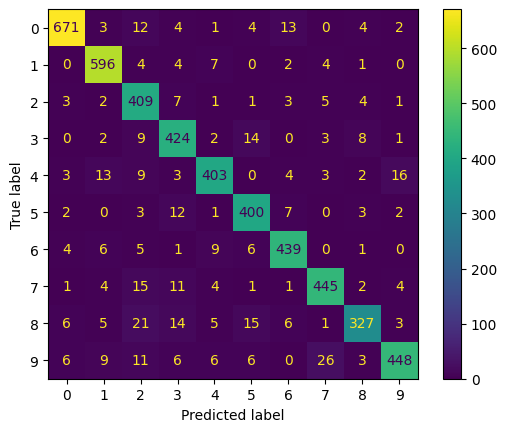

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
features_d_test = features_test[domains_test == 0] 
digits_d_test = digits_test[domains_test == 0] 
features_d_test1 = features_test[domains_test == 4] 
digits_d_test1 = digits_test[domains_test == 4] 
features_d_test2 = features_test[domains_test == 1] 
digits_d_test2 = digits_test[domains_test == 1] 
features = np.concatenate((features_d_test[:500], features_d_test1[:3500], features_d_test2[:1000]))
digits = np.concatenate((digits_d_test[:500], digits_d_test1[:3500], digits_d_test2[:1000]))
digits_pred = forest_train[3].predict(features)
domain_rfc.fit(features_d_test, digits_d_test)
accuracy = forest_train[4].score(features, digits)
sum1+=accuracy
print(f"Accuracy domain { 4 }:", accuracy)
print(f"Confusion matrix { 4 }:") 
confusion_matrix = metrics.confusion_matrix(digits, digits_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4","5","6","7","8","9"])
cm_display.plot()
plt.show()

In [ ]:
avg=sum1/5
print("average accuracy2:", avg)

average accuracy2: 0.8077818181818183


Accuracy domain 0: 0.8218181818181818
Confusion matrix 0:


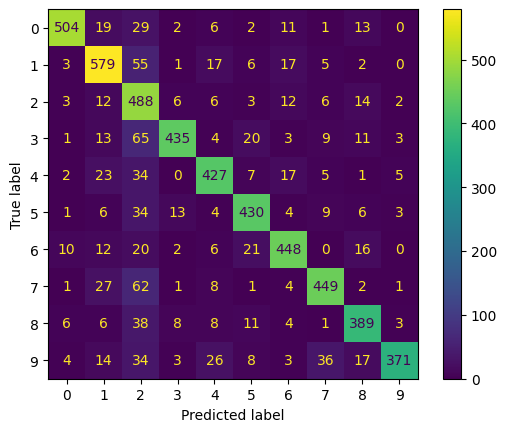

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
features_d_test = features_test[domains_test == 4] 
digits_d_test = digits_test[domains_test == 4] 
features_d_test1 = features_test[domains_test == 0] 
digits_d_test1 = digits_test[domains_test == 0] 
features_d_test2 = features_test[domains_test == 2] 
digits_d_test2 = digits_test[domains_test == 2] 
features_d_test3 = features_test[domains_test == 3] 
digits_d_test3 = digits_test[domains_test == 3] 
features = np.concatenate((features_d_test[:1000], features_d_test1[:3500], features_d_test2[:500], features_d_test3[:500]))
digits = np.concatenate((digits_d_test[:1000], digits_d_test1[:3500], digits_d_test2[:500], digits_d_test3[:500]))
digits_pred = forest_train[0].predict(features)
accuracy = forest_train[0].score(features, digits)
print(f"Accuracy domain { 0 }:", accuracy)
print(f"Confusion matrix { 0 }:") 
confusion_matrix = metrics.confusion_matrix(digits, digits_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0","1","2","3","4","5","6","7","8","9"])
cm_display.plot()
plt.show()